In [48]:
import pandas as pd

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
data = pd.read_csv('../data/german-credit.data')

In [50]:
# since sklearn doesn't support classified data, this line splits classification into columns 

categorized = pd.get_dummies(data, columns=['checking_account_status', 'credit_history', 'purpose', 'savings_account_status', 'employment_years', 'personal_status', 'guarantors', 'property', 'installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'])

In [51]:
train, test = train_test_split(categorized, test_size=0.2)

attributes = train.loc[:, train.columns != 'credit_status']
credit_status = train.loc[:,['credit_status']]

attributes_test = test.loc[:, train.columns != 'credit_status']
credit_status_test = test.loc[:,['credit_status']]

In [52]:
from sklearn.tree import DecisionTreeClassifier

dt3 = DecisionTreeClassifier(min_samples_split = 3)
dt3 = dt3.fit(attributes, credit_status)
pred = dt3.predict(attributes_test)

score = accuracy_score(pred.round(), credit_status_test)
print(score)

0.685


In [53]:
from sklearn.linear_model import LogisticRegression, LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(attributes, credit_status)
pred = linear_regression.predict(attributes_test)

score = accuracy_score(pred.round(), credit_status_test)
print(score)

0.77


In [54]:
from sklearn.naive_bayes import GaussianNB

NBC = GaussianNB()
NBC.fit(attributes, credit_status)
r = NBC.predict(attributes_test)

score = accuracy_score(r.round(), credit_status_test)
print(score)

0.74


In [55]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(n_jobs=-1, max_iter=20000)
logistic_regression.fit(attributes, credit_status)
r = logistic_regression.predict(attributes_test)

score = accuracy_score(r.round(), credit_status_test)
print(score)

0.79


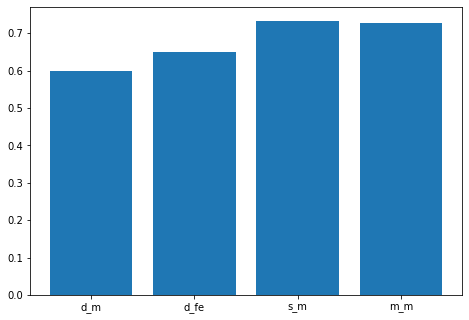

x


In [56]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fe = ['A92, A95']
values = []
female = data.loc[(data['personal_status'] == 'A91') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['personal_status'] == 'A91')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['personal_status'] == 'A92') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['personal_status'] == 'A92')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['personal_status'] == 'A93') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['personal_status'] == 'A93')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['personal_status'] == 'A94') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['personal_status'] == 'A94')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

langs = ['d_m', 'd_fe', 's_m', 'm_m']
ax.bar(langs,values)
plt.show()


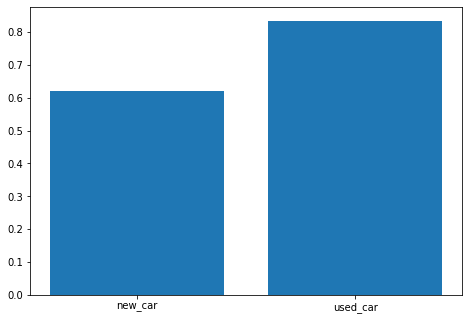

x


In [58]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fe = ['A92, A95']
values = []

female = data.loc[(data['purpose'] == 'A40') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['purpose'] == 'A40')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['purpose'] == 'A41') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['purpose'] == 'A41')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)


langs = ['new_car', 'used_car']
ax.bar(langs,values)
plt.show()
print('x')

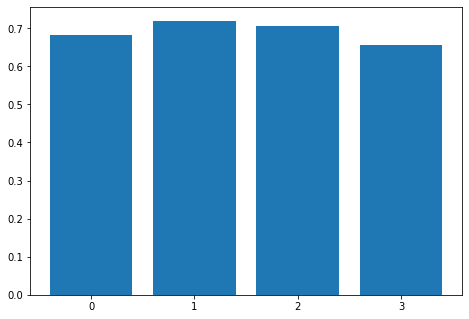

x


In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fe = ['A92, A95']
values = []

female = data.loc[(data['job'] == 'A171') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A171')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['job'] == 'A172') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A172')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['job'] == 'A173') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A173')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)


female = data.loc[(data['job'] == 'A174') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A174')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

langs = ['0', '1', '2', '3']
ax.bar(langs,values)
plt.show()
print('x')

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fe = ['A92, A95']
values = []

female = data.loc[(data['job'] == 'A171') & (data['credit_status'] == 1)].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A171')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['job'] == 'A172') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A172')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

female = data.loc[(data['job'] == 'A173') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A173')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)


female = data.loc[(data['job'] == 'A174') & data['credit_status'] == 1].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
female_t = data.loc[(data['job'] == 'A174')].shape[0] # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
values.append(female/female_t)

langs = ['0', '1', '2', '3']
ax.bar(langs,values)
plt.show()
print('x')